## **Analisa Morfologi Citra**

Analisis morfologi pada citra adalah suatu teknik pemrosesan citra yang digunakan untuk mengidentifikasi, mengukur, dan mengubah bentuk dan struktur objek dalam citra.

Erosi: Erosi adalah operasi morfologi yang digunakan untuk menghilangkan elemen-elemen kecil (objek yang memiliki area kecil) dalam citra

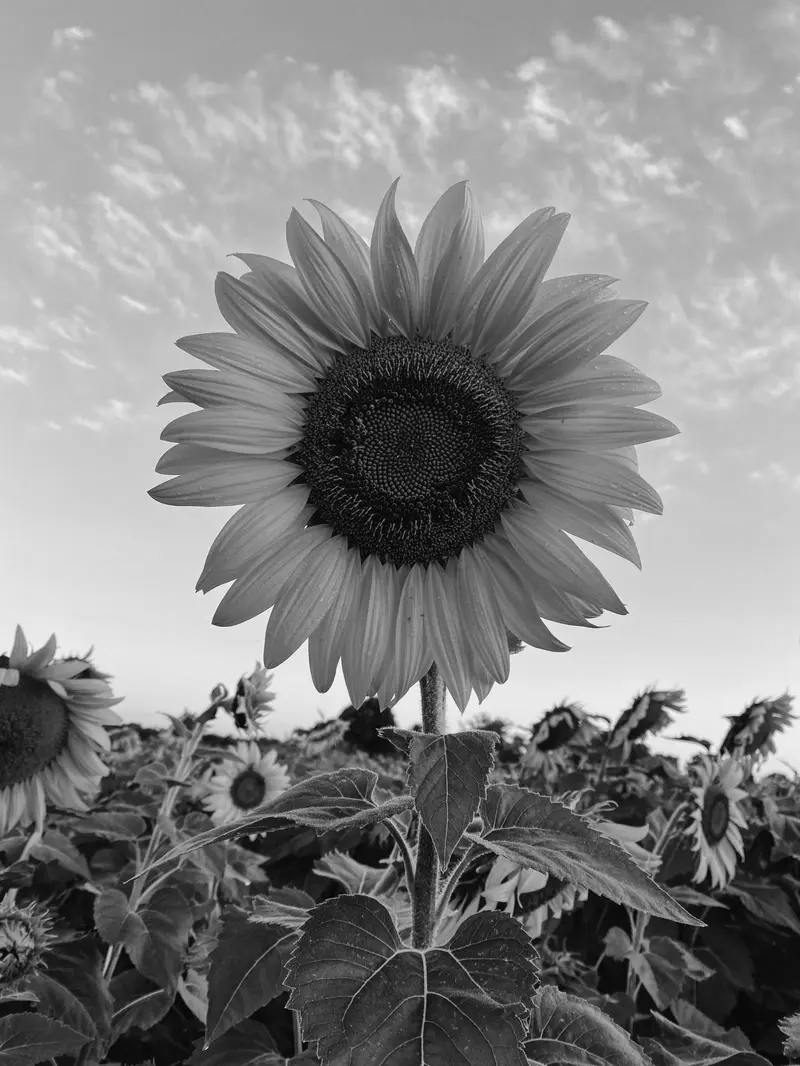

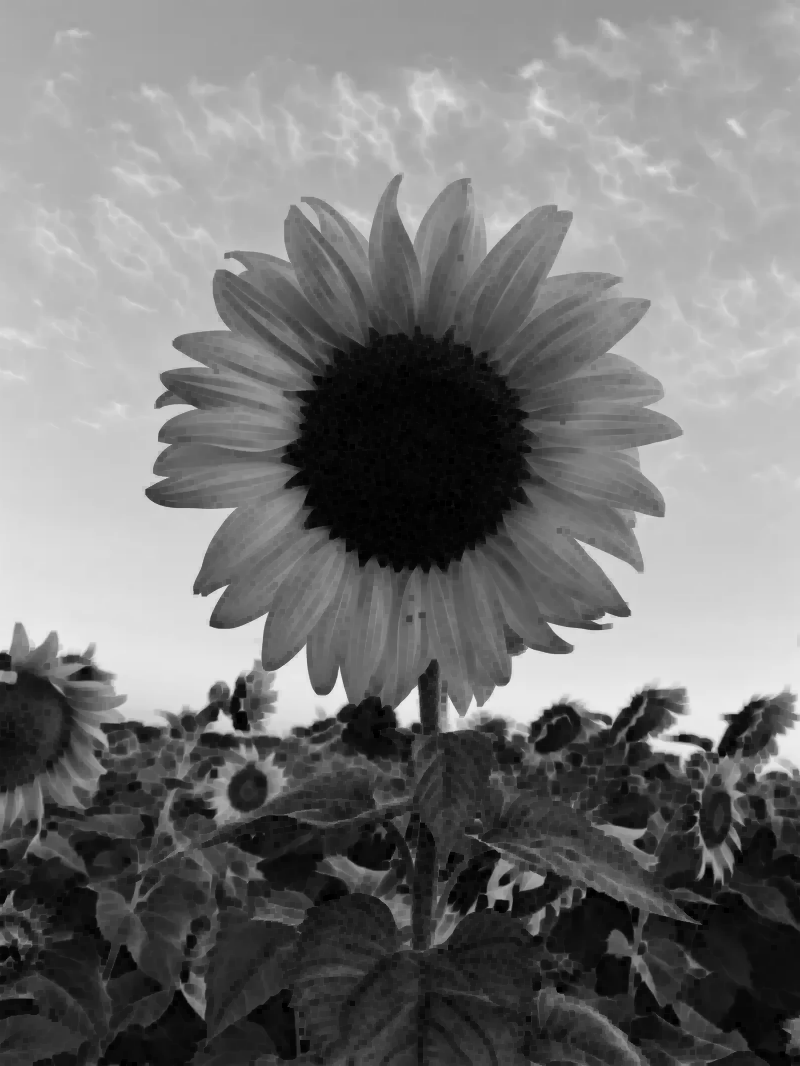

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra
img = cv2.imread('img2.jpeg', 0)  # Ganti 'input_image.jpg' dengan nama citra Anda
cv2_imshow( img)

# Membuat kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Melakukan erosi
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan citra hasil erosi
cv2_imshow( erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()


Dilasi: Dilasi adalah operasi morfologi yang digunakan untuk memperbesar objek dalam citra.

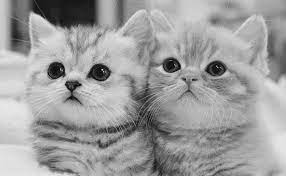

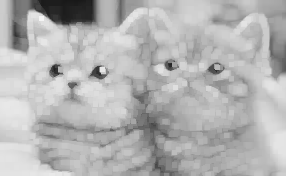

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra
img = cv2.imread('img3.jpeg', 0)  # Ganti 'input_image.jpg' dengan nama citra Anda
cv2_imshow( img)

# Membuat kernel untuk dilasi
kernel = np.ones((5, 5), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Melakukan dilasi
dilation = cv2.dilate(img, kernel, iterations=1)

# Menampilkan citra hasil dilasi
cv2_imshow(dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()


Opening adalah operasi morfologi yang menggabungkan erosi dan dilasi. Ini digunakan untuk menghilangkan noise kecil di sekitar objek dan membuka celah-celah kecil dalam objek.


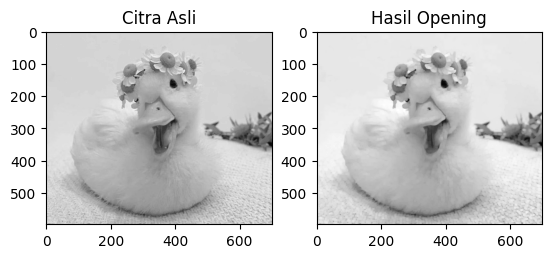

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca citra dari Google Colab
img_path = "img4.jpg"  # Ganti dengan path citra Anda di Google Colab
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Membuat kernel untuk opening
kernel = np.ones((5, 5), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Melakukan opening
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan citra asli dan citra hasil opening
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Hasil Opening')
plt.show()


Skeletonization: Ini adalah proses yang digunakan untuk mengurangi objek dalam citra ke representasi paling sederhana, yang disebut sebagai "kerangka" objek. Hal ini berguna dalam pengenalan pola

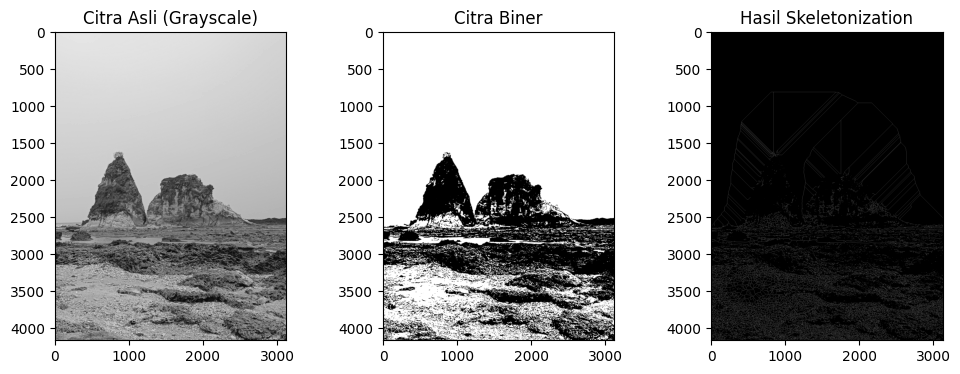

In [5]:
!pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology

# Baca citra dari URL atau upload dari komputer
img_url = "img5.jpeg"  # Ganti dengan URL citra Anda atau path lokal
image = io.imread(img_url)

# Ubah citra ke grayscale jika tidak sudah dalam grayscale
gray_image = color.rgb2gray(image)

# Binarisasi citra (mengubah ke citra hitam-putih)
binary_image = gray_image > 0.5  # Anda bisa mengubah nilai ambang sesuai kebutuhan

# Lakukan skeletonization
skeleton = morphology.skeletonize(binary_image)

# Tampilkan citra asli, citra biner, dan hasil skeletonization
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_image, cmap='gray'), plt.title('Citra Asli (Grayscale)')
plt.subplot(132), plt.imshow(binary_image, cmap='gray'), plt.title('Citra Biner')
plt.subplot(133), plt.imshow(skeleton, cmap='gray'), plt.title('Hasil Skeletonization')
plt.show()


Morfologi Region: Ini adalah operasi morfologi yang digunakan untuk mengidentifikasi dan mengukur properti wilayah dalam citra, seperti luas, keliling, dan bentuk objek.

In [1]:
import cv2
import numpy as np

# Baca citra biner
binary_image = cv2.imread('img3.jpeg', cv2.IMREAD_GRAYSCALE)

# Labeling wilayah-wilayah
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

# Loop melalui wilayah-wilayah yang telah diberi label
for label in range(1, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    perimeter = cv2.arcLength(np.array(np.where(labels == label)).T, True)

    print(f"Wilayah {label}: Luas = {area}, Keliling = {perimeter}")


Wilayah 1: Luas = 50323, Keliling = 100369.74423217773


Hitung Lobang: Operasi ini digunakan untuk menghitung jumlah lubang dalam objek dalam citra.

In [3]:
import numpy as np
from skimage import io, measure

# Baca citra biner dari URL atau upload dari komputer
img_url = "img1.jpeg"  # Ganti dengan URL citra Anda atau path lokal
binary_image = io.imread(img_url, as_gray=True)

# Labeling wilayah-wilayah dalam citra biner
labeled_image = measure.label(binary_image, connectivity=2)

# Hitung jumlah lubang (wilayah dengan luas = 1)
hole_count = np.sum(labeled_image == 1)

# Tampilkan jumlah lubang
print(f"Jumlah Lubang: {hole_count}")


Jumlah Lubang: 2


Transformasi Jarak: Digunakan untuk mengukur jarak dari setiap piksel dalam citra terhadap objek terdekat. Ini berguna dalam ekstraksi fitur dan segmentasi objek.

## **Feature Detection**

In [5]:
#import library
import cv2
import matplotlib.pyplot as plt

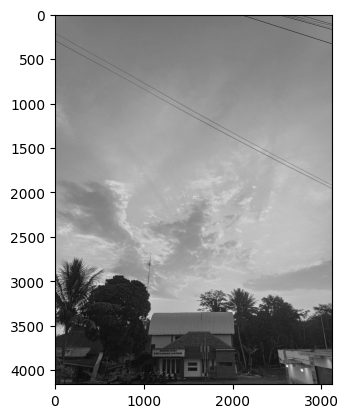

In [6]:
im = cv2.imread('img1.jpeg') #Sesuaikan dengan nama file
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')
plt.show()

In [7]:
#Menerapkan filter canny
filter_canny = cv2.Canny(im,25,255,L2gradient=False)
#Menerapkan filter sobel
filter_sobel = cv2.Sobel(src=im, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=5)


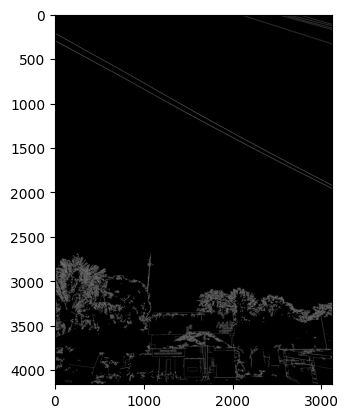

In [8]:
plt.imshow(filter_canny, cmap='gray')
plt.show()

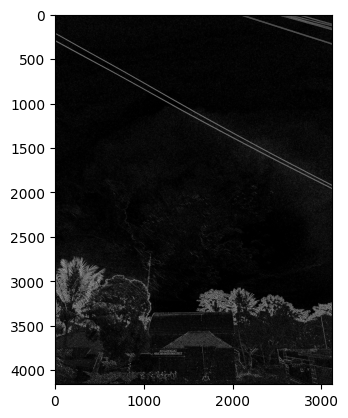

In [9]:
plt.imshow(filter_sobel, cmap='gray')
plt.show()

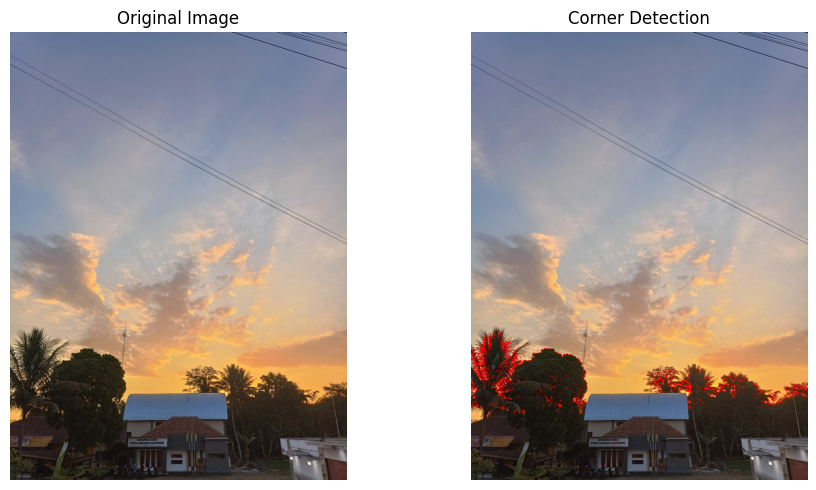

In [11]:
import cv2
import numpy as np

# Load the image
image_path = 'img1.jpeg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform corner detection using the Harris corner detection algorithm
corner_detection = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
corner_detection = cv2.dilate(corner_detection, None)

# Define a threshold for identifying corners
threshold = 0.01 * corner_detection.max()

# Mark the detected corners with a red color
marked_image = image.copy()
marked_image[corner_detection > threshold] = [0, 0, 255]  # Red color for corners

# Display the original and marked images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
plt.title('Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

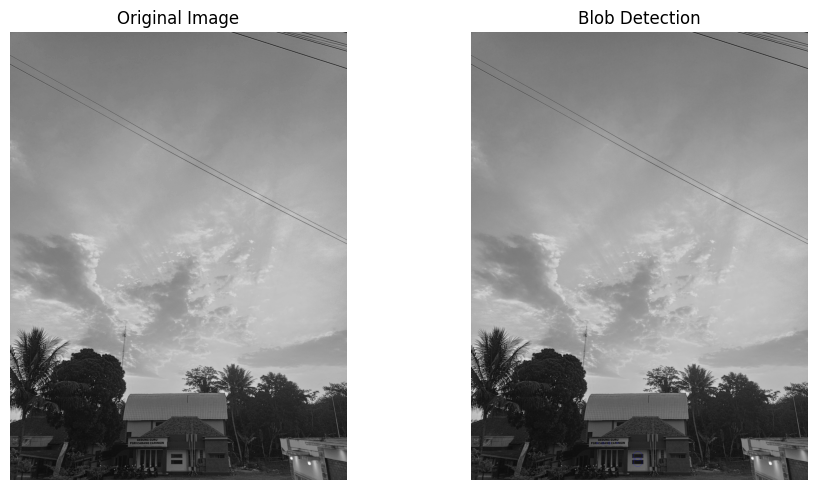

In [13]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

image_path = 'img1.jpeg'
image = cv2.imread(image_path)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area
params.filterByArea = True
params.minArea = 100

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original and marked images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('Blob Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

Saving img1.jpeg to img1 (1).jpeg


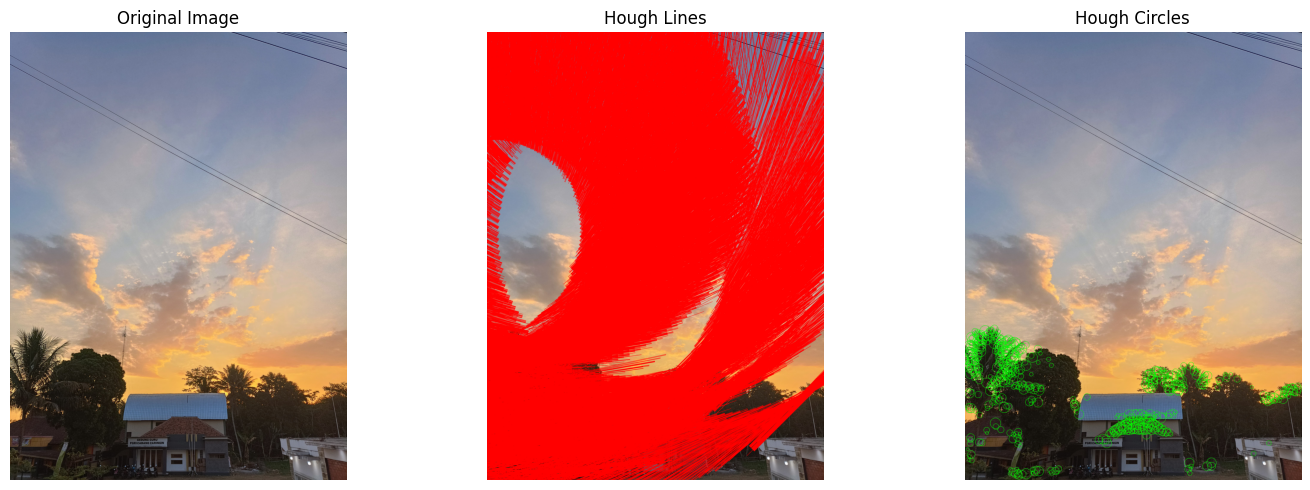

In [14]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve Hough transform accuracy
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform standard Hough Line Transform
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Draw detected lines on a copy of the original image
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Perform Hough Circle Transform
circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=10, maxRadius=50)

# Draw detected circles on a copy of the original image
image_with_circles = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(image_with_circles, center, radius, (0, 255, 0), 2)

# Display the original image, lines, and circles using Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB))
plt.title('Hough Circles')
plt.axis('off')

plt.tight_layout()
plt.show()

Saving img1.jpeg to img1 (2).jpeg


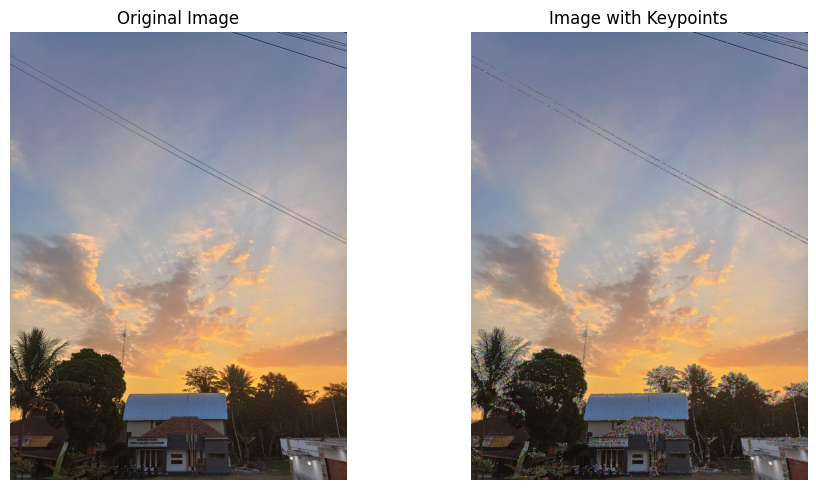

In [15]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the original image and the image with keypoints using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with Keypoints')
plt.axis('off')

plt.tight_layout()
plt.show()

Saving img1.jpeg to img1 (3).jpeg


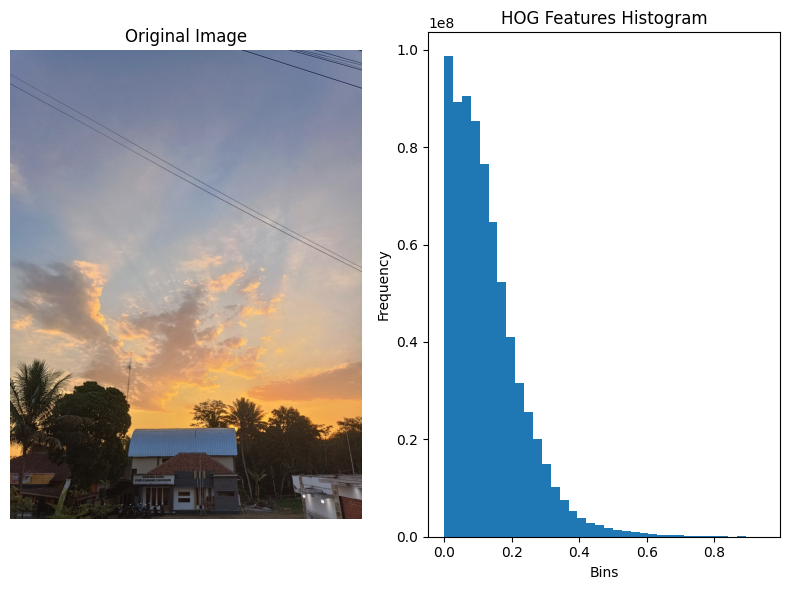

In [16]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a HOG descriptor object
hog = cv2.HOGDescriptor()

# Compute HOG features
hog_features = hog.compute(gray_image)

# Plot the HOG features as a histogram
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(hog_features, bins=36)
plt.title('HOG Features Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Saving img1.jpeg to img1 (4).jpeg


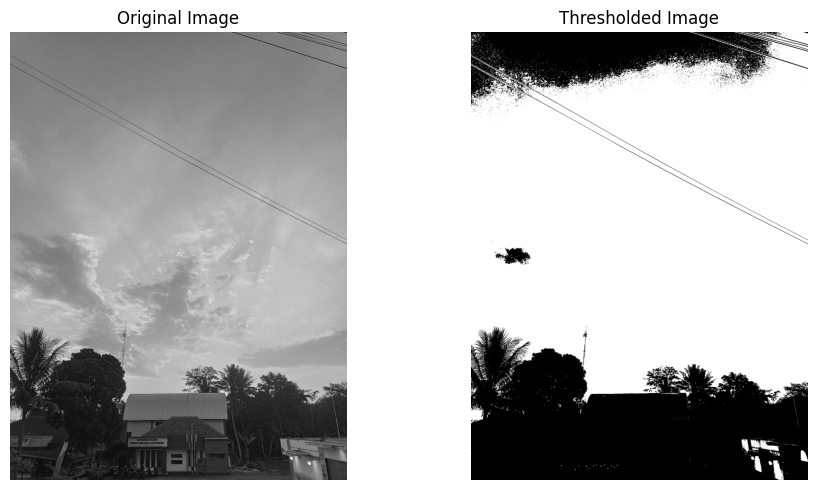

In [17]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding using cv2.threshold()
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()